In [2]:
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [
    ("Ali", 34, "Dokter", "Membaca", "Laki-laki"),
    ("Budi", 23, "Guru", "Olahraga", "Laki-laki"),
    ("Citra", 29, "Insinyur", "Musik", "Perempuan"),
    ("Dina", 45, "Perawat", "Berkebun", "Perempuan"),
    ("Dewi", 31, "Programmer", "Gaming", "Perempuan"),
    ("Gio", 28, "Designer", "Melukis", "Laki-laki")
]
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()


+-----+----+----------+--------+---------+
| Nama|Usia| Pekerjaan|    Hobi|   Gender|
+-----+----+----------+--------+---------+
|  Ali|  34|    Dokter| Membaca|Laki-laki|
| Budi|  23|      Guru|Olahraga|Laki-laki|
|Citra|  29|  Insinyur|   Musik|Perempuan|
| Dina|  45|   Perawat|Berkebun|Perempuan|
| Dewi|  31|Programmer|  Gaming|Perempuan|
|  Gio|  28|  Designer| Melukis|Laki-laki|
+-----+----+----------+--------+---------+



In [7]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Data dalam bentuk dictionary
data = {
    "Nama": ["Ali", "Budi", "Citra", "Dina", "Dewi", "Gio"],
    "Usia": [34, 23, 29, 45, 31, 28],
    "Pekerjaan": ["Dokter", "Guru", "Insinyur", "Perawat", "Programmer", "Designer"],
    "Hobi": ["Membaca", "Olahraga", "Musik", "Berkebun", "Gaming", "Melukis"],
    "Gender": ["Laki-laki", "Laki-laki", "Perempuan", "Perempuan", "Perempuan", "Laki-laki"],
    "Gaji": [15000000, 8000000, 12000000, 10000000, 13000000, 9000000]
}

# Konversi ke list of tuples
rows = list(zip(
    data["Nama"], data["Usia"], data["Pekerjaan"],
    data["Hobi"], data["Gender"], data["Gaji"]
))

# Nama kolom
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender", "Gaji"]

# Membuat DataFrame
df = spark.createDataFrame(rows, columns)

# Menampilkan DataFrame lengkap
print("=== Data Lengkap ===")
df.show()

# Filtering data: berdasarkan usia > 30
print("=== Data Berdasarkan Usia > 30 ===")
df_filtered = df.filter(df['Usia'] > 30)
df_filtered.show()

# Menghitung rata-rata usia
print("=== Rata-rata Usia ===")
df.groupBy().agg(avg("Usia").alias("Rata-rata Usia")).show()

# Mengurutkan data berdasarkan usia
print("=== Data Diurutkan Berdasarkan Usia (Tertinggi ke Terendah) ===")
df_sorted = df.orderBy("Usia", ascending=False)
df_sorted.show()

# Mengurutkan data berdasarkan alphabet A-Z
print("=== Data Diurutkan Berdasarkan Alphabet ===")
df_sorted_name = df.orderBy("Nama", ascending=True)
df_sorted_name.show()


=== Data Lengkap ===
+-----+----+----------+--------+---------+--------+
| Nama|Usia| Pekerjaan|    Hobi|   Gender|    Gaji|
+-----+----+----------+--------+---------+--------+
|  Ali|  34|    Dokter| Membaca|Laki-laki|15000000|
| Budi|  23|      Guru|Olahraga|Laki-laki| 8000000|
|Citra|  29|  Insinyur|   Musik|Perempuan|12000000|
| Dina|  45|   Perawat|Berkebun|Perempuan|10000000|
| Dewi|  31|Programmer|  Gaming|Perempuan|13000000|
|  Gio|  28|  Designer| Melukis|Laki-laki| 9000000|
+-----+----+----------+--------+---------+--------+

=== Data Berdasarkan Usia > 30 ===
+----+----+----------+--------+---------+--------+
|Nama|Usia| Pekerjaan|    Hobi|   Gender|    Gaji|
+----+----+----------+--------+---------+--------+
| Ali|  34|    Dokter| Membaca|Laki-laki|15000000|
|Dina|  45|   Perawat|Berkebun|Perempuan|10000000|
|Dewi|  31|Programmer|  Gaming|Perempuan|13000000|
+----+----+----------+--------+---------+--------+

=== Rata-rata Usia ===
+------------------+
|    Rata-rata Usia|


In [9]:
import pandas as pd

# Data yang sama seperti sebelumnya
data = {
    "Nama": ["Ali", "Budi", "Citra", "Dina", "Dewi", "Gio"],
    "Usia": [34, 23, 29, 45, 31, 28],
    "Pekerjaan": ["Dokter", "Guru", "Insinyur", "Perawat", "Programmer", "Designer"],
    "Hobi": ["Membaca", "Olahraga", "Musik", "Berkebun", "Gaming", "Melukis"],
    "Gender": ["Laki-laki", "Laki-laki", "Perempuan", "Perempuan", "Perempuan", "Laki-laki"],
    "Gaji": [15000000, 8000000, 12000000, 10000000, 13000000, 9000000]
}

# Membuat DataFrame Pandas
df_pandas = pd.DataFrame(data)

# Tambahkan kolom baru: "Status Usia"
# Misalnya: Usia > 30 dianggap "Senior", selain itu "Menengah"
df_pandas["Status Usia"] = df_pandas["Usia"].apply(lambda x: "Senior" if x > 30 else "Menengah")

# ✅ Filtering data: hanya yang usianya lebih dari 30
df_filtered = df_pandas[df_pandas["Usia"] > 30]

# Menampilkan hasil
print("=== DataFrame Lengkap dengan Kolom Tambahan ===")
print(df_pandas)

print("\n=== Data yang Difilter Berdasarkan Usia > 30 ===")
print(df_filtered)


=== DataFrame Lengkap dengan Kolom Tambahan ===
    Nama  Usia   Pekerjaan      Hobi     Gender      Gaji Status Usia
0    Ali    34      Dokter   Membaca  Laki-laki  15000000      Senior
1   Budi    23        Guru  Olahraga  Laki-laki   8000000    Menengah
2  Citra    29    Insinyur     Musik  Perempuan  12000000    Menengah
3   Dina    45     Perawat  Berkebun  Perempuan  10000000      Senior
4   Dewi    31  Programmer    Gaming  Perempuan  13000000      Senior
5    Gio    28    Designer   Melukis  Laki-laki   9000000    Menengah

=== Data yang Difilter Berdasarkan Usia > 30 ===
   Nama  Usia   Pekerjaan      Hobi     Gender      Gaji Status Usia
0   Ali    34      Dokter   Membaca  Laki-laki  15000000      Senior
3  Dina    45     Perawat  Berkebun  Perempuan  10000000      Senior
4  Dewi    31  Programmer    Gaming  Perempuan  13000000      Senior


=== DataFrame Gabungan ===
    Nama  Usia   Pekerjaan      Hobi     Gender      Gaji
0    Ali    34      Dokter   Membaca  Laki-laki  15000000
1   Budi    23        Guru  Olahraga  Laki-laki   8000000
2  Citra    29    Insinyur     Musik  Perempuan  12000000
3   Dina    45     Perawat  Berkebun  Perempuan  10000000
4   Dewi    31  Programmer    Gaming  Perempuan  13000000
5    Gio    28    Designer   Melukis  Laki-laki   9000000

=== Statistik Deskriptif ===
            Usia          Gaji
count   6.000000  6.000000e+00
mean   31.666667  1.116667e+07
std     7.474401  2.639444e+06
min    23.000000  8.000000e+06
25%    28.250000  9.250000e+06
50%    30.000000  1.100000e+07
75%    33.250000  1.275000e+07
max    45.000000  1.500000e+07


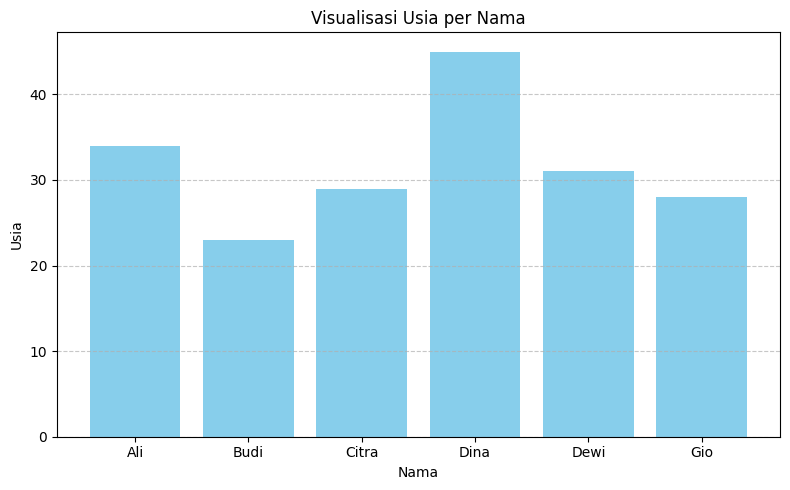

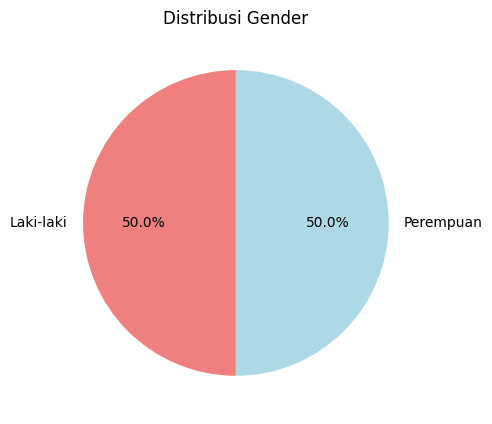

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Data pertama: Nama dan Usia
data1 = {
    "Nama": ["Ali", "Budi", "Citra", "Dina", "Dewi", "Gio"],
    "Usia": [34, 23, 29, 45, 31, 28]
}
df1 = pd.DataFrame(data1)

# Data kedua: Nama, Pekerjaan, Hobi, Gender, Gaji
data2 = {
    "Nama": ["Ali", "Budi", "Citra", "Dina", "Dewi", "Gio"],
    "Pekerjaan": ["Dokter", "Guru", "Insinyur", "Perawat", "Programmer", "Designer"],
    "Hobi": ["Membaca", "Olahraga", "Musik", "Berkebun", "Gaming", "Melukis"],
    "Gender": ["Laki-laki", "Laki-laki", "Perempuan", "Perempuan", "Perempuan", "Laki-laki"],
    "Gaji": [15000000, 8000000, 12000000, 10000000, 13000000, 9000000]
}
df2 = pd.DataFrame(data2)

# Join kedua DataFrame berdasarkan kolom "Nama"
df_joined = pd.merge(df1, df2, on="Nama")

# Menampilkan hasil gabungan
print("=== DataFrame Gabungan ===")
print(df_joined)

# Statistik deskriptif untuk kolom numerik
print("\n=== Statistik Deskriptif ===")
print(df_joined.describe())

# Visualisasi: Bar chart usia per orang
plt.figure(figsize=(8, 5))
plt.bar(df_joined["Nama"], df_joined["Usia"], color="skyblue")
plt.title("Visualisasi Usia per Nama")
plt.xlabel("Nama")
plt.ylabel("Usia")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualisasi: Pie chart komposisi gender
plt.figure(figsize=(5, 5))
df_joined["Gender"].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=["lightcoral", "lightblue"])
plt.title("Distribusi Gender")
plt.ylabel("")
plt.tight_layout()
plt.show()


In [11]:
# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df.toPandas()

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Menampilkan DataFrame hasil konversi
df_pandas_from_spark, df_spark_from_pandas.show()

df.groupBy().agg(avg("Usia")).show()

+-----+----+----------+--------+---------+--------+-----------+
| Nama|Usia| Pekerjaan|    Hobi|   Gender|    Gaji|Status Usia|
+-----+----+----------+--------+---------+--------+-----------+
|  Ali|  34|    Dokter| Membaca|Laki-laki|15000000|     Senior|
| Budi|  23|      Guru|Olahraga|Laki-laki| 8000000|   Menengah|
|Citra|  29|  Insinyur|   Musik|Perempuan|12000000|   Menengah|
| Dina|  45|   Perawat|Berkebun|Perempuan|10000000|     Senior|
| Dewi|  31|Programmer|  Gaming|Perempuan|13000000|     Senior|
|  Gio|  28|  Designer| Melukis|Laki-laki| 9000000|   Menengah|
+-----+----+----------+--------+---------+--------+-----------+

+------------------+
|         avg(Usia)|
+------------------+
|31.666666666666668|
+------------------+



In [12]:
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.functions import max

# Memulai Spark session
spark = SparkSession.builder.appName("Tugas6GabungMaxUsia").getOrCreate()

# Data PySpark
data_spark = [
    ("Ali", 34), ("Budi", 23), ("Citra", 29)
]
columns_spark = ["Nama", "Usia"]
df_spark = spark.createDataFrame(data_spark, columns_spark)

# Data Pandas
data_pandas = {
    "Nama": ["Dina", "Dewi", "Gio"],
    "Usia": [45, 31, 28]
}
df_pandas = pd.DataFrame(data_pandas)

# Konversi Pandas → PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Gabungkan kedua DataFrame PySpark
df_combined = df_spark.unionByName(df_spark_from_pandas)

# Menampilkan hasil gabungan
print("=== Data Gabungan (PySpark + Pandas) ===")
df_combined.show()

# Menghitung nilai maksimum usia
print("=== Nilai Maksimum Usia ===")
df_combined.agg(max("Usia").alias("Usia Maksimum")).show()


=== Data Gabungan (PySpark + Pandas) ===
+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
| Dewi|  31|
|  Gio|  28|
+-----+----+

=== Nilai Maksimum Usia ===
+-------------+
|Usia Maksimum|
+-------------+
|           45|
+-------------+

